<a href="https://colab.research.google.com/github/guillermocalderon2021/03MIAR_Algoritmos_de_Optimizacion/blob/main/Algoritmos_GuillermoCalderon_AG2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Actividad guiada 2**
## **Nombre:** Guillermo de Jesús Calderón
**Repositorio:** https://github.com/guillermocalderon2021/03MIAR_Algoritmos_de_Optimizacion/blob/main/Algoritmos_GuillermoCalderon_AG2.ipynb

## **Ejemplo:** Método de descenso de gradiente

Solucion:  [-2.179146621277112e-05, 7.733313721190435e-05] 6.4552821107375715e-09


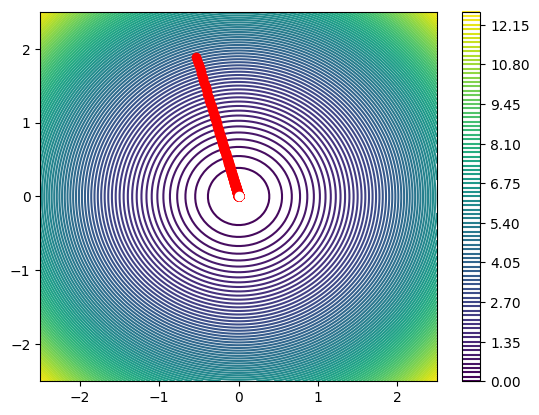

In [7]:
import math
import matplotlib.pyplot as plt
import numpy as np
import random

f=lambda X:X[0]**2+X[1]**2
df=lambda X:[2*X[0],2*X[1]]

#Prepara los datos para dibujar mapa de niveles de Z
resolucion=100
rango=2.5
X=np.linspace(-rango,rango,resolucion)
Y=np.linspace(-rango,rango,resolucion)
Z=np.zeros((resolucion,resolucion))

for ix, x in enumerate(X):
  for iy,y in enumerate(Y):
    Z[ix,iy]=f([x,y])

contour=plt.contour(X,Y,Z,resolucion)
cbar=plt.colorbar(contour)

#Generar punto de partida aleatorio
P=[random.uniform(-rango,rango),random.uniform(-rango,rango)]
plt.plot(P[0],P[1],"o",c="red")
TA=0.01

for _ in range(500):
  grad=df(P)
  P[0],P[1]=P[0]-TA*grad[0],P[1]-TA*grad[1]
  plt.plot(P[0],P[1],"o",c="red")

plt.plot(P[0],P[1],"o",c="white")
print("Solucion: ", P, f(P))

## **Ejercicio:** Mejoras al algoritmo de descenso de gradiente

- Se actualiza la tasa de aprendizaje con cada iteración usando el **Método de la Secante** para acelerar la convergencia.
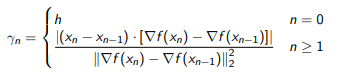
- Se usa un criterio de parada ($\left| \nabla f(x,y) \right| < tol$, donde $tol$ es la tolerancia) y un número máximo de iteraciones
- Se usa la libreria sympy para el cálculo de las derivadas y la evaluación de funciones símbolicas

$$
f(x,y)=sin(1/2x^2-1/4y^2+3)*cos(2x+1-e^y)
$$

In [4]:
import numpy as np
from numpy import linalg
import sympy
from sympy import *

# Funcion del método de descenso de gradiente
def gradient_descent(gradient,init_values,learning_rate,tol=1e-5,maxit=1e5,vars=[x,y],print_flag=False):
    x0=init_values # Guardamos los valores iniciales en x0
    i=1 # contador de iteraciones
    while i<=maxit: # repetimos mientras no pase el limite de iteraciones
        # obtenemos el valor de x(i+1)=x(i)-ratio*grad(x(i))
        x1=[float(x0[j]-learning_rate*gradient[j].subs(dict(zip(vars,x0)))) for j in range(len(vars))]
        error=linalg.norm([float(gradient[j].subs(dict(zip(vars,x1)))) for j in range(len(vars))],2) # Norma del vector grad(x(i+1))
        if print_flag:
            print(f'i={i}, {dict(zip(vars,x1))}, error={error}') # Imprimiendo cada iteracion
        if error<tol: # Si el error es menor que la tolerancia
            print(f'Numero de iteraciones requeridas: {i}')
            return x1 # retornamos valor aproximado
        else:    # Si el error es mayor que la tolerancia
            # Actualizamos la tasa de aprendizaje con el método de la secante
            learning_rate=linalg.norm((np.array(x0)-np.array(x1))*[float(gradient[j].subs(dict(zip(vars,x1)))-gradient[j].subs(dict(zip(vars,x0)))) for j in range(len(vars))],2)/linalg.norm([float(gradient[j].subs(dict(zip(vars,x1)))-gradient[j].subs(dict(zip(vars,x0)))) for j in range(len(vars))],2)**2
            x0=x1 # reasigamos variables
            i+=1
    return False

In [10]:
import random
x,y=symbols('x y') # Declarando variables simbolicas
f=sin(1/2*x**2-1/4*y**2+3)*cos(2*x+1-exp(y))# Funcion objetivo
init_values=[random.uniform(-2,2),random.uniform(-2,2)] # Valores iniciales aleatorios
learning_rate=0.05 #Tasa de aprendizaje inicial
gradient=[f.diff(x) for x in [x,y]] #Calculando el gradiente de la funcion objetivo
print(f'Gradiente={gradient}')
aprox=gradient_descent(gradient,init_values,learning_rate,print_flag=True)
print(f'Valores aproximados: x={aprox[0]}, y={aprox[1]}')
min=f.subs(dict(zip([x,y],aprox)))
print(f'Valor Minimo: {float(min)}')

Gradiente=[1.0*x*cos(2*x - exp(y) + 1)*cos(0.5*x**2 - 0.25*y**2 + 3) - 2*sin(2*x - exp(y) + 1)*sin(0.5*x**2 - 0.25*y**2 + 3), -0.5*y*cos(2*x - exp(y) + 1)*cos(0.5*x**2 - 0.25*y**2 + 3) + exp(y)*sin(2*x - exp(y) + 1)*sin(0.5*x**2 - 0.25*y**2 + 3)]
i=1, {x: -1.8736829805578674, y: -1.6868650427718235}, error=1.5588421491167903
i=2, {x: -1.63142914527256, y: -1.7766033769937577}, error=1.7761265037334213
i=3, {x: -0.08747896314056347, y: -2.398539598763696}, error=1.34189521359554
i=4, {x: 1.6993939262202178, y: -2.485881839378723}, error=1.1697592836772281
i=5, {x: 0.9211905356752408, y: -2.8084541509494407}, error=0.8116878514081068
i=6, {x: 1.2258992215660776, y: -2.757394763858012}, error=0.872959354741439
i=7, {x: 1.0866133986102209, y: -2.8192555752197226}, error=0.051790240281898166
i=8, {x: 1.0897416292611264, y: -2.8264375016685648}, error=0.040404384241045255
i=9, {x: 1.0976984259470632, y: -2.847035997168454}, error=0.008184383552725305
i=10, {x: 1.099283013011848, y: -2.851690

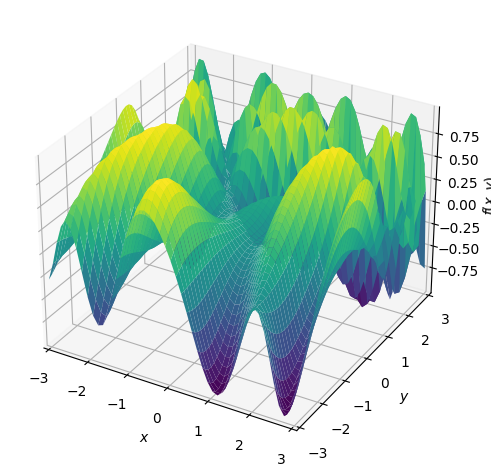

In [11]:
from sympy.plotting import plot3d
plot3d(f, (x, -3, 3), (y, -3, 3))